# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Fettleibigkeit bei Erwachsene
### 1.2 Fragestellung:
-   Wie hoch ist der prozentuale Anteil der Erwachsenen ab 18 Jahren, die basierend auf gemessener Körpergröße und Gewicht einen BMI von 30 kg/m² oder höher aufweisen?
### 1.3 Datenquelle(n):
- https://ourworldindata.org/grapher/share-of-adults-defined-as-obese?tab=table 




### 1.4 Daten beschaffen und laden

In [1]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import sys
!{sys.executable} -m pip install pandas

In [28]:
import pandas as pd 
df = pd.read_csv('share-of-adults-defined-as-obese.csv', skiprows=1, 
                 names=['Gebiet', 'Code', 'Jahr', 'Fettleibigkeit'])
df.head()

,Gebiet,Code,Jahr,Fettleibigkeit
0,Afghanistan,AFG,1975,0.4
1,Afghanistan,AFG,1976,0.4
2,Afghanistan,AFG,1977,0.5
3,Afghanistan,AFG,1978,0.5
4,Afghanistan,AFG,1979,0.5


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [12]:
df_pivot = df_aggregated.pivot(index='Gebiet', columns='Jahr', values='Fettleibigkeit')
print(df_pivot.head())

Jahr    1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  ...  2007  \
Gebiet                                                              ...         
AFG      0.4   0.4   0.5   0.5   0.5   0.6   0.6   0.6   0.7   0.7  ...   2.8   
AGO      0.7   0.8   0.8   0.8   0.9   0.9   1.0   1.1   1.1   1.2  ...   4.3   
ALB      5.7   5.8   6.0   6.1   6.3   6.4   6.6   6.8   7.0   7.2  ...  16.9   
AND     13.4  14.0  14.5  15.0  15.6  16.0  16.5  17.0  17.4  17.9  ...  25.1   
ARE     10.8  10.9  10.9  11.1  11.3  11.7  12.1  12.6  13.2  13.7  ...  21.5   

Jahr    2008  2009  2010  2011  2012  2013  2014  2015  2016  
Gebiet                                                        
AFG      2.9   3.1   3.3   3.5   3.7   3.9   4.1   4.3   4.5  
AGO      4.6   4.8   5.1   5.3   5.6   5.9   6.2   6.5   6.8  
ALB     17.5  18.1  18.7  19.3  19.9  20.5  21.1  21.7  22.3  
AND     25.4  25.7  26.0  26.3  26.6  27.0  27.3  27.7  28.0  
ARE     21.5  21.8  22.5  23.4  24.5  25.8  27.2  28.6

## 3. Statistik der Rohdaten (Analyse im Long-Format)
1. Variablenanalyse
- Die Variable "Fettleibigkeit" ist kontinuierlich, da sie Dezimalwerte enthält.
- Die Variablen "Jahr" und "Code/Gebiet" sind diskret mit einer festen Anzahl von Kategorien:
   - Jahr: 42 einzigartige Werte (1975–2016)
   - Gebiet: 191 verschiedene Länder/Regionen
2. Anzahl der Datenpunkte
- Für jede Region (Gebiet) und jedes Jahr sind 197 Datenpunkte vorhanden.
- Es gibt keine fehlenden Werte in den Spalten "Jahr" und "Fettleibigkeit". In der Spalte "Code" sind einige Werte fehlend, dies hat jedoch die Analyse nicht beeinträchtigt.
3. Verteilung der Variablen
- Das Histogramm der Fettleibigkeitswerte zeigt eine rechtsschiefe Verteilung:
   - Der Mittelwert liegt bei 11.87%.
   - Der Median beträgt 10.10%, was zeigt, dass die Mehrheit der Länder geringere Fettleibigkeitswerte aufweist.
   - Regionen mit besonders hohen Durchschnittswerten (z.B. Pazifikstaaten) ziehen den Mittelwert nach oben.
4. Datenpunkte pro Klasse
- Jede Region verfügt über 42 Datenpunkte (ein Punkt pro Jahr zwischen 1975 und 2016).
- Die Daten sind gleichmässig verteilt, was eine zuverlässige Analyse der zeitlichen Entwicklung ermöglicht.
5. Zusammenhänge zwischen Variablen
- Erste visuelle Analysen zeigen, dass der Anteil der Fettleibigkeit in vielen Ländern über die Zeit gestiegen ist.



In [13]:
df.dtypes

Gebiet             object
Jahr                int64
Fettleibigkeit    float64
dtype: object

### 3.1 Analyse Gebiete

1. Anzahl der verschiedenen Gebiete: 
- Insgesamt gibt es 191 einzigartige Gebiete (Länder oder Regionen) in den Daten. 
2. Anzahl der Datenpunkte pro Gebiet:
- Die Datenpunkte sind gleichmässig auf die meisten Gebiete verteilt, wobei jedes Gebiet 42 Datenpunkte enthält. Dies legt nahe, dass für jedes Jahr (von 1975 bis 2016) Daten für jedes Gebiet erfasst wurden.
3. Visualisierung der Datenpunkte:
- Die Top 10 Gebiete mit der höchsten Anzahl an Datenpunkten sind in einem horizontalen Balkendiagramm dargestellt. Hier zeigt sich, dass alle Gebiete in den Top 10 die gleiche Anzahl an Datenpunkten (42) aufweisen.
- Das zweite Diagramm zeigt die Anzahl der Datenpunkte für alle Gebiete in einem Balkendiagramm. Es bestätigt die gleichmäßige Verteilung der Datenpunkte über die Gebiete.

In [14]:
print("Anzahl verschiedener Gebiete: ", len(df["Gebiet"].unique()))

Anzahl verschiedener Gebiete:  191


In [15]:
# Anzahl Datenpunkte pro Gebiet
df["Gebiet"].value_counts()

Gebiet
AFG    42
OMN    42
NLD    42
NZL    42
NIC    42
       ..
GEO    42
DEU    42
GHA    42
GRC    42
ZWE    42
Name: count, Length: 190, dtype: int64

<Axes: xlabel='Anzahl', ylabel='Gebiet'>

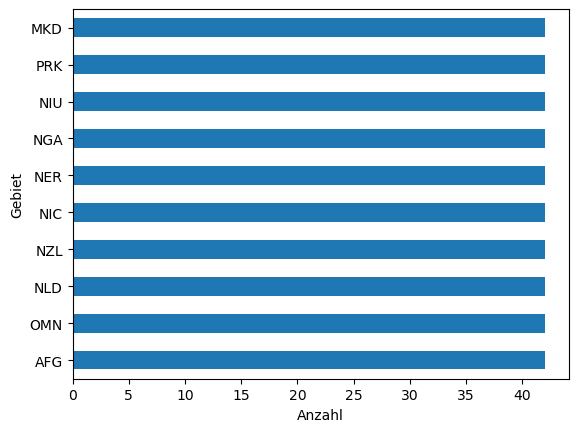

In [18]:
df["Gebiet"].value_counts().head(10).plot(kind="barh" , xlabel="Anzahl")

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

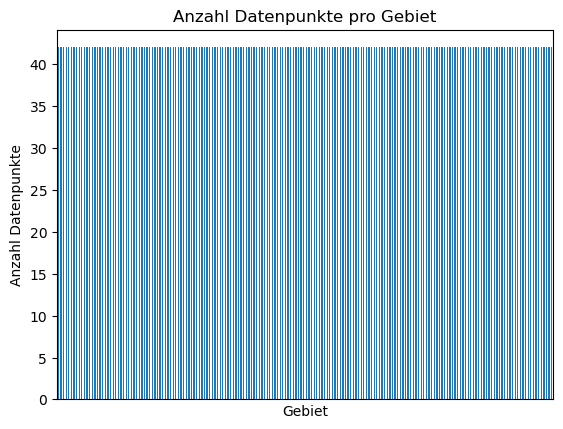

In [23]:
df["Gebiet"].value_counts().plot(kind="bar",
                                 xticks=[],     # disable labels on x-axis
                                 ylabel="Anzahl Datenpunkte", title="Anzahl Datenpunkte pro Gebiet")

### 3.2 Analyse Codes

1. Anzahl verschiedener Codes:
- Es gibt insgesamt 191 verschiedene Codes, die den jeweiligen Ländern oder Regionen zugeordnet sind.
2. Anzahl der Datenpunkte pro Code:
- Die Verteilung der Datenpunkte zeigt, dass jeder Code (Ländercode) 42 Datenpunkte hat. Dies entspricht den 42 Jahren (von 1975 bis 2016) für jedes Land oder jede Region.
3. Visualisierung der Datenpunkte:
- Das Balkendiagramm bestätigt die gleichmässige Verteilung der Datenpunkte über alle Codes.
- Jeder Code hat exakt 42 Einträge, was auf eine konsistente Datenerfassung hinweist.

In [29]:
print("Anzahl verschiedener Codes:", len(df["Code"].unique()))

Anzahl verschiedener Codes: 191


In [30]:
# Anzahl Datenpunkte pro Gebiet
df["Code"].value_counts()

Code
AFG    42
OMN    42
NLD    42
NZL    42
NIC    42
       ..
GEO    42
DEU    42
GHA    42
GRC    42
ZWE    42
Name: count, Length: 190, dtype: int64

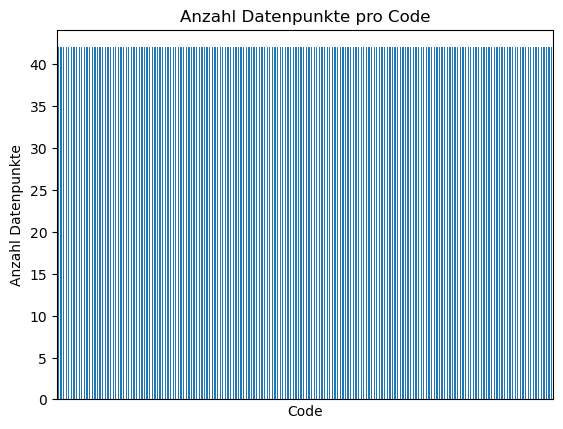

In [31]:
df["Code"].value_counts().plot(kind="bar", xticks=[], ylabel="Anzahl Datenpunkte", title="Anzahl Datenpunkte pro Code");

### 3.3 Analyse Jahr

1. Anzahl der verschiedenen Jahre:
- Die Daten umfassen insgesamt 42 einzigartige Jahre von 1975 bis 2016.
2. Anzahl der Datenpunkte pro Jahr:
- Jedes Jahr enthält 197 Datenpunkte, was auf eine vollständige und gleichmässige Verteilung der Daten für alle Länder und Regionen hinweist.
3. Visualisierung der Datenpunkte:
- Das Diagramm zeigt eine konstante Anzahl von Datenpunkten über die gesamten 42 Jahre hinweg.
- Die rote Linie bei 2016 markiert das letzte Jahr der Daten.

In [12]:
print("Anzahl verschiedener Jahre:", len(df["Jahr"].unique()))

Anzahl verschiedener Jahre: 42


In [13]:
# Anzahl Datenpunkte pro Jahr
df["Jahr"].value_counts().sort_index()

Jahr
1975    197
1976    197
1977    197
1978    197
1979    197
1980    197
1981    197
1982    197
1983    197
1984    197
1985    197
1986    197
1987    197
1988    197
1989    197
1990    197
1991    197
1992    197
1993    197
1994    197
1995    197
1996    197
1997    197
1998    197
1999    197
2000    197
2001    197
2002    197
2003    197
2004    197
2005    197
2006    197
2007    197
2008    197
2009    197
2010    197
2011    197
2012    197
2013    197
2014    197
2015    197
2016    197
Name: count, dtype: int64

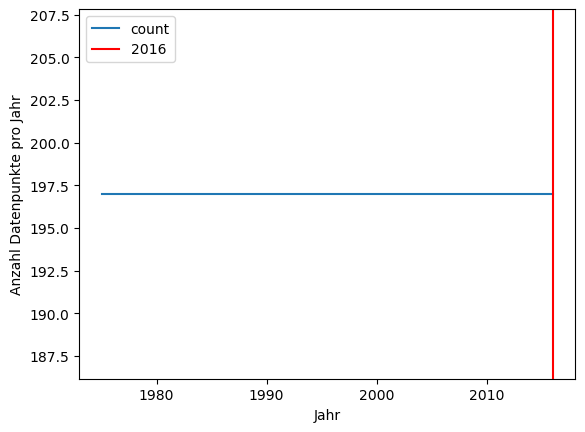

In [15]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df["Jahr"].value_counts().sort_index().plot(ylabel="Anzahl Datenpunkte pro Jahr");
g.axvline(x=2016, color="red", label="2016") # rote Linie bei 2016 - ab sind alle Jahre enthalten
g.legend()  # Legende anzeigen

In [66]:
df.describe()

,Jahr,Fettleibigkeit
count,8274.000000,8274.000000
mean,1995.500000,11.866594
std,12.121651,9.696335
min,1975.000000,0.100000
25%,1985.000000,3.900000
50%,1995.500000,10.100000
75%,2006.000000,17.700000
max,2016.000000,60.700000


### 3.4 Analyse Fettleibigkeit

1. Histogramm der Fettleibigkeitsverteilung:
 - Das Histogramm zeigt die Verteilung der Fettleibigkeitswerte über alle Länder und Jahre.
 - Die meisten Datenpunkte liegen zwischen 0% und 20%, was darauf hinweist, dass in vielen Regionen der Anteil an fettleibigen Erwachsenen relativ niedrig ist.
 - Der Mittelwert liegt bei 11.87% (rote Linie), während der Median bei 10.10% (orange Linie) liegt.
 - Der Unterschied zwischen Mittelwert und Median zeigt, dass die Verteilung rechtsschief ist, d.h., es gibt einige Regionen mit deutlich höheren Werten, die den Mittelwert anheben.
2. Durchschnittliche Fettleibigkeitswerte pro Gebiet:
 - Die Top 10 Regionen mit den höchsten durchschnittlichen Fettleibigkeitswerten sind dargestellt.
 - An der Spitze stehen Länder wie NRU (Nauru) und PLW (Palau) mit durchschnittlichen Werten von über 50%.
 - Diese Länder befinden sich vor allem in der pazifischen Region, wo Fettleibigkeit traditionell ein großes Problem darstellt.

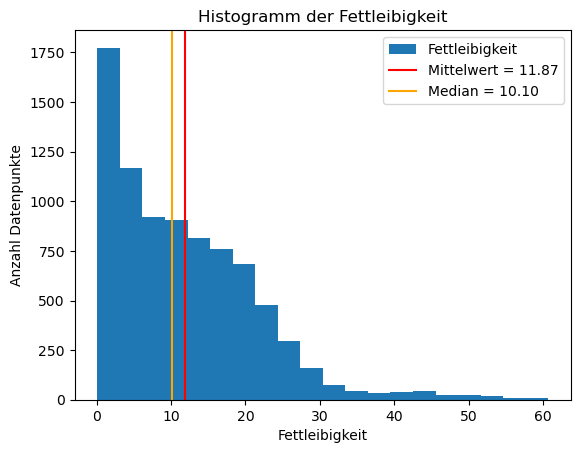

In [61]:
g = df['Fettleibigkeit'].plot(kind='hist', bins=20, title='Histogramm der Fettleibigkeit', 
                           xlabel='Fettleibigkeit', ylabel='Anzahl Datenpunkte')
mean = df['Fettleibigkeit'].mean()
g.axvline(x=df['Fettleibigkeit'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Fettleibigkeit'].median()
g.axvline(x=df['Fettleibigkeit'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

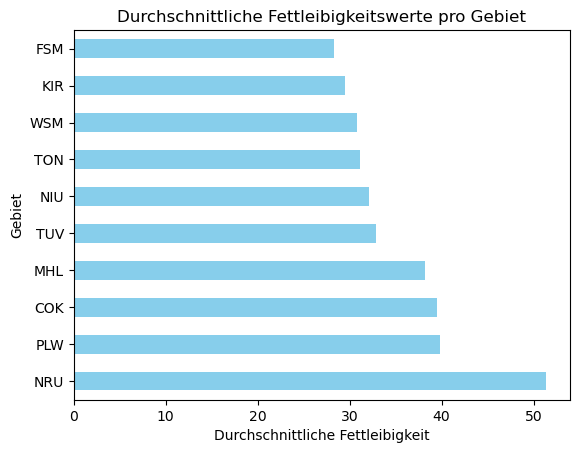

In [70]:
gebiet_avg = df.groupby('Gebiet')['Fettleibigkeit'].mean()
gebiet_avg = gebiet_avg.sort_values(ascending=False).head(10)
gebiet_avg.plot(kind="barh", xlabel="Durchschnittliche Fettleibigkeit", ylabel="Gebiet", title="Durchschnittliche Fettleibigkeitswerte pro Gebiet", color='skyblue')
plt.show()

In [76]:
print(df.groupby('Gebiet')['Fettleibigkeit'].describe())

        count       mean       std   min     25%    50%     75%   max
Gebiet                                                               
AFG      42.0   1.795238  1.209304   0.4   0.800   1.45   2.575   4.5
AGO      42.0   2.811905  1.809083   0.7   1.225   2.30   4.050   6.8
ALB      42.0  12.016667  5.177857   5.7   7.475  10.80  16.050  22.3
AND      42.0  21.390476  4.115278  13.4  18.400  21.65  24.725  28.0
ARE      42.0  18.226190  5.046277  10.8  14.425  17.85  21.675  29.9
...       ...        ...       ...   ...     ...    ...     ...   ...
WSM      42.0  30.769048  8.874642  17.6  22.750  30.20  38.725  45.5
YEM      42.0   6.788095  3.377559   2.5   3.850   6.20   9.125  14.1
ZAF      42.0  16.364286  5.682400   8.7  11.200  15.55  20.975  27.0
ZMB      42.0   3.252381  1.408032   1.3   2.225   2.95   4.050   6.5
ZWE      42.0   7.250000  2.824393   3.0   4.650   7.20   9.625  12.3

[190 rows x 8 columns]


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



### Überblick der Fettleibigkeitsdaten

In [34]:
mean_per_year = df.groupby('Jahr')['Fettleibigkeit'].mean()
print(mean_per_year)


Jahr
1975     6.027411
1976     6.221827
1977     6.417259
1978     6.619289
1979     6.831980
1980     7.044162
1981     7.271066
1982     7.503553
1983     7.743147
1984     7.995431
1985     8.251777
1986     8.520812
1987     8.800000
1988     9.078680
1989     9.368020
1990     9.676650
1991     9.983249
1992    10.293401
1993    10.608629
1994    10.925888
1995    11.246701
1996    11.581218
1997    11.913198
1998    12.256345
1999    12.606091
2000    12.952284
2001    13.301523
2002    13.660914
2003    14.028426
2004    14.406091
2005    14.779695
2006    15.160914
2007    15.556853
2008    15.965990
2009    16.377157
2010    16.812183
2011    17.252284
2012    17.706091
2013    18.171066
2014    18.653807
2015    19.160406
2016    19.665482
Name: Fettleibigkeit, dtype: float64


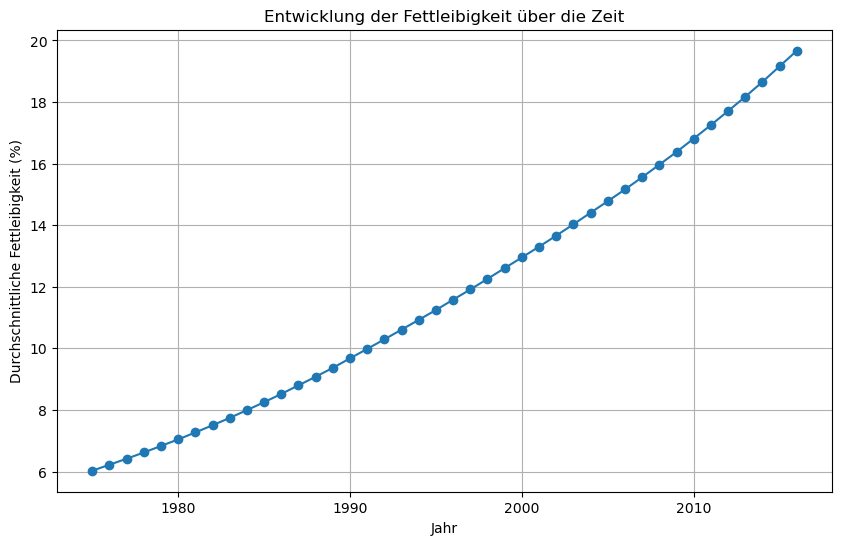

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(mean_per_year.index, mean_per_year.values, marker='o', linestyle='-')
plt.title('Entwicklung der Fettleibigkeit über die Zeit')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Fettleibigkeit (%)')
plt.grid(True)
plt.show()


### Länder mit extremen Werten identifizieren

In [36]:
mean_per_country = df.groupby('Gebiet')['Fettleibigkeit'].mean()

# Top 5 Länder
top_5 = mean_per_country.sort_values(ascending=False).head(5)
print("Top 5 Länder mit der höchsten Fettleibigkeit:")
print(top_5)

# Bottom 5 Länder
bottom_5 = mean_per_country.sort_values().head(5)
print("Bottom 5 Länder mit der niedrigsten Fettleibigkeit:")
print(bottom_5)


Top 5 Länder mit der höchsten Fettleibigkeit:
Gebiet
Nauru               51.373810
Palau               39.876190
Cook Islands        39.450000
Marshall Islands    38.183333
Tuvalu              32.857143
Name: Fettleibigkeit, dtype: float64
Bottom 5 Länder mit der niedrigsten Fettleibigkeit:
Gebiet
Vietnam       0.630952
East Timor    1.109524
Bangladesh    1.145238
Cambodia      1.226190
Nepal         1.361905
Name: Fettleibigkeit, dtype: float64


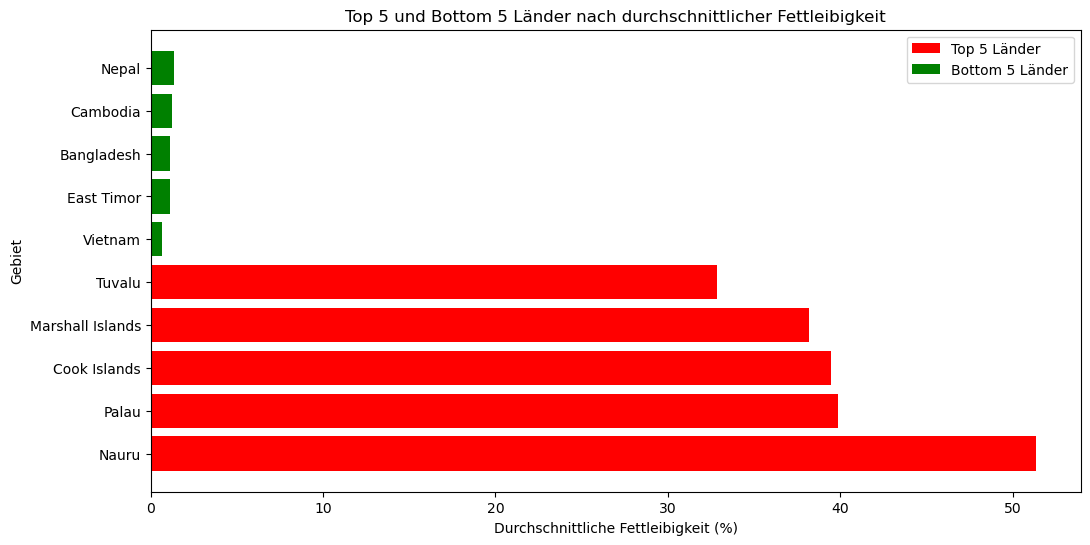

In [41]:
plt.figure(figsize=(12, 6))

# Plot der Top 5 Länder
plt.barh(top_5.index, top_5.values, color='red', label='Top 5 Länder')

# Plot der Bottom 5 Länder
plt.barh(bottom_5.index, bottom_5.values, color='green', label='Bottom 5 Länder')

plt.title('Top 5 und Bottom 5 Länder nach durchschnittlicher Fettleibigkeit')
plt.xlabel('Durchschnittliche Fettleibigkeit (%)')
plt.ylabel('Gebiet')
plt.legend()
plt.show()


### Verteilung der Fettleibigkeitswerte analysieren

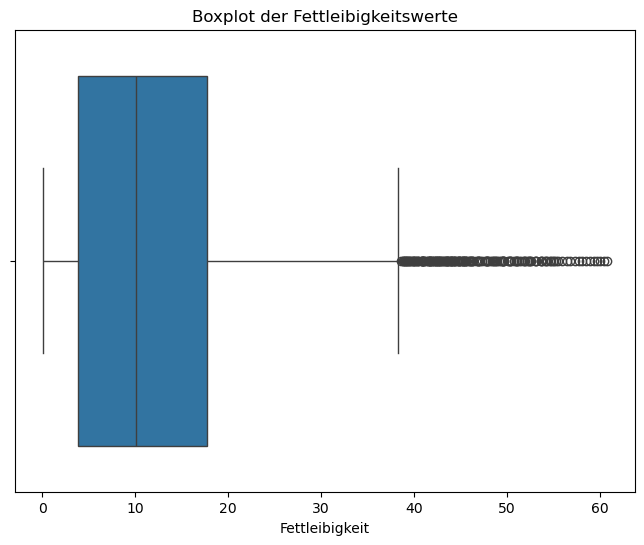

In [38]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fettleibigkeit'])
plt.title('Boxplot der Fettleibigkeitswerte')
plt.show()
